In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
_URL = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/K4zxDdv3-cdJng'
zip_dir = tf.keras.utils.get_file('test33.zip', origin=_URL, extract=True)

202506734/202506734 [==============================] - 11s 0us/step


In [ ]:
zip_dir_base = os.path.dirname(zip_dir)
for root, dirs, files in os.walk(zip_dir_base):
    for directory in dirs:
        print(os.path.join(root, directory))

/root/.keras/datasets/mri
/root/.keras/datasets/mri/Validation
/root/.keras/datasets/mri/Training
/root/.keras/datasets/mri/Testing
/root/.keras/datasets/mri/Validation/glioma
/root/.keras/datasets/mri/Validation/notumor
/root/.keras/datasets/mri/Validation/pituitary
/root/.keras/datasets/mri/Validation/meningioma
/root/.keras/datasets/mri/Training/glioma
/root/.keras/datasets/mri/Training/notumor
/root/.keras/datasets/mri/Training/pituitary
/root/.keras/datasets/mri/Training/meningioma
/root/.keras/datasets/mri/Testing/glioma
/root/.keras/datasets/mri/Testing/notumor
/root/.keras/datasets/mri/Testing/pituitary
/root/.keras/datasets/mri/Testing/meningioma


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'mri')
train_dir = os.path.join(base_dir,'Training')
train_glioma_dir = os.path.join(train_dir, 'glioma')
train_meningioma_dir = os.path.join(train_dir, 'meningioma')
train_notumor_dir = os.path.join(train_dir, 'notumor')
train_pituitary_dir = os.path.join(train_dir, 'pituitary')

val_dir = os.path.join(base_dir,'Validation')
val_glioma_dir = os.path.join(val_dir, 'glioma')
val_meningioma_dir = os.path.join(val_dir, 'meningioma')
val_notumor_dir = os.path.join(val_dir, 'notumor')
val_pituitary_dir = os.path.join(val_dir, 'pituitary')

test_dir = os.path.join(base_dir,'Testing')
test_glioma_dir = os.path.join(test_dir, 'glioma')
test_meningioma_dir = os.path.join(test_dir, 'meningioma')
test_notumor_dir = os.path.join(test_dir, 'notumor')
test_pituitary_dir = os.path.join(test_dir, 'pituitary')

In [ ]:
num_glioma_tr = len(os.listdir(train_glioma_dir))
num_meningioma_tr = len(os.listdir(train_meningioma_dir))
num_notumor_tr = len(os.listdir(train_notumor_dir))
num_pituitary_tr = len(os.listdir(train_pituitary_dir))

total_train = num_glioma_tr+num_meningioma_tr+num_notumor_tr+num_pituitary_tr

num_glioma_val = len(os.listdir(val_glioma_dir))
num_meningioma_val = len(os.listdir(val_meningioma_dir))
num_notumor_val = len(os.listdir(val_notumor_dir))
num_pituitary_val = len(os.listdir(val_pituitary_dir))

total_val = num_glioma_val+num_meningioma_val+num_notumor_val+num_pituitary_val

num_glioma_test = len(os.listdir(test_glioma_dir))
num_meningioma_test = len(os.listdir(test_meningioma_dir))
num_notumor_test = len(os.listdir(test_notumor_dir))
num_pituitary_test = len(os.listdir(test_pituitary_dir))

total_test = num_glioma_test+num_meningioma_test+num_notumor_test+num_pituitary_test

In [ ]:
print('num_glioma_tr: ', num_glioma_tr)
print('num_meningioma_tr: ', num_meningioma_tr)
print('num_notumor_tr: ', num_notumor_tr)
print('num_pituitary_tr: ', num_pituitary_tr)
print('--')
print('Всего изображений в тренировочном наборе данных: ', total_train)
print('num_glioma_val: ', num_glioma_val)
print('num_meningioma_val: ', num_meningioma_val)
print('num_notumor_val: ', num_notumor_val)
print('num_pituitary_val: ', num_pituitary_val)
print('--')
print('Всего изображений в валидационном наборе данных: ', total_val)
print('num_glioma_test: ', num_glioma_test)
print('num_meningioma_test: ', num_meningioma_test)
print('num_notumor_test: ', num_notumor_test)
print('num_pituitary_test: ', num_pituitary_test)
print('--')
print('Всего изображений в тестовом наборе данных: ', total_test)

num_glioma_tr:  1321
num_meningioma_tr:  1339
num_notumor_tr:  1595
num_pituitary_tr:  1457
--
Всего изображений в тренировочном наборе данных:  5712
num_glioma_val:  300
num_meningioma_val:  306
num_notumor_val:  291
num_pituitary_val:  300
--
Всего изображений в валидационном наборе данных:  1197
num_glioma_test:  317
num_meningioma_test:  256
num_notumor_test:  290
num_pituitary_test:  255
--
Всего изображений в тестовом наборе данных:  1118


In [ ]:
BATCH_SIZE = 50
IMG_SHAPE = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
val_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='categorical')

Found 5712 images belonging to 4 classes.


In [ ]:
val_data_gen = val_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=val_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='categorical' )

Found 1197 images belonging to 4 classes.


In [ ]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=test_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='categorical')

Found 1118 images belonging to 4 classes.


In [ ]:
sample_training_images, y = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

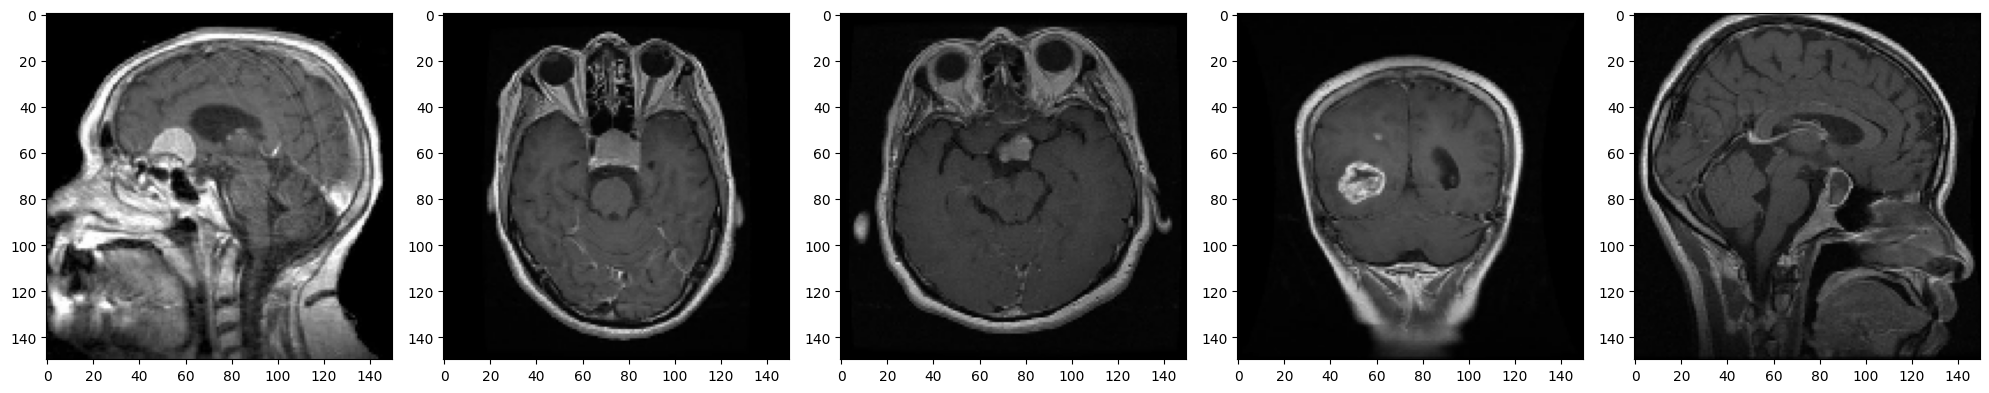

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_gen, epochs=8,
                    validation_data=val_data_gen)

Epoch 1/8
115/115 [==============================] - 159s 1s/step - loss: 0.7708 - accuracy: 0.6716 - val_loss: 0.6001 - val_accuracy: 0.7536
Epoch 2/8
115/115 [==============================] - 165s 1s/step - loss: 0.4608 - accuracy: 0.8246 - val_loss: 0.5031 - val_accuracy: 0.7845
Epoch 3/8
115/115 [==============================] - 167s 1s/step - loss: 0.3644 - accuracy: 0.8542 - val_loss: 0.3950 - val_accuracy: 0.8379
Epoch 4/8
115/115 [==============================] - 156s 1s/step - loss: 0.3081 - accuracy: 0.8864 - val_loss: 0.3316 - val_accuracy: 0.8697
Epoch 5/8
115/115 [==============================] - 157s 1s/step - loss: 0.2475 - accuracy: 0.9074 - val_loss: 0.2560 - val_accuracy: 0.8947
Epoch 6/8
115/115 [==============================] - 166s 1s/step - loss: 0.2076 - accuracy: 0.9273 - val_loss: 0.2931 - val_accuracy: 0.8730
Epoch 7/8
115/115 [==============================] - 166s 1s/step - loss: 0.1750 - accuracy: 0.9328 - val_loss: 0.2245 - val_accuracy: 0.9140
Epoch 

23/23 [==============================] - 11s 484ms/step - loss: 4.1047 - accuracy: 0.5537


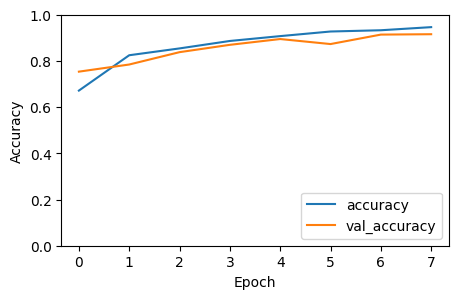

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data_gen)

In [ ]:
scores = model.evaluate(test_data_gen, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

23/23 [==============================] - 11s 483ms/step - loss: 3.4017 - accuracy: 0.5966
Доля верных ответов на тестовых данных, в процентах: 59.6601


In [ ]:
test_images, y = next(test_data_gen)

In [ ]:
y_pred=model.predict(test_images)

2/2 [==============================] - 0s 140ms/step


In [ ]:
class_names = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

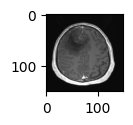

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(test_images[26])

In [ ]:
y_pred[26]

array([4.4077282e-08, 5.1753938e-02, 9.4824600e-01, 2.8442477e-08],
      dtype=float32)

In [ ]:
k=y_pred[26].argmax()
class_names[k]

'no_tumor'